
# Homework #3

Winter 2025 - UCLA, Student: Budhaditya De, UCLA ID: 206182210


## Task 1

### Introduction

In this task, a python script is developed using functions to preprocess and prepare a dataset from the ball bearings of a pump's motor, followed by performing clustring analysis to group the datapoints and identify the health states of the ball bearings. The K-means and DBSCAN algorithms are used for this purpose and the results are presented for both PCA and non-PCA transformed data. In task 1, the clustering is carried out on non-PCA data while in task 2, results are exhibited for the PCA transformed data.

1. The function preprocess() is called in the following codeblock which carries out the preprocessing on the raw dataset. The raw data is first observed and all feature columns are converted and made of 'float64' datatype. After dropping the 'unnamed' column, all rows with NaNs in every column are dropped along with columns which have more than 50% NaN entries. The remaining NaNs are forward filled. Filters on the 'rms' and 'var' columns are included to ensure all negative values are dropped. Note that for this HW, I havent dropped features based on COV and correlation since we are trying to observe the overall mechanism of the clustering procedure and dropping features (i.e. reducing dimentionality) might affect the procedure. Therefore it was decided to keep all features. In an ideal practical problem, we would drop the features based on COV and redundancy.

In [42]:

import Hw3

df_clean = Hw3.preprocess()

2. (a) 2-D scatter plots for each pair of features are presented here. I used the pairplot() function in seaborn to plot the 2D scatter matrix

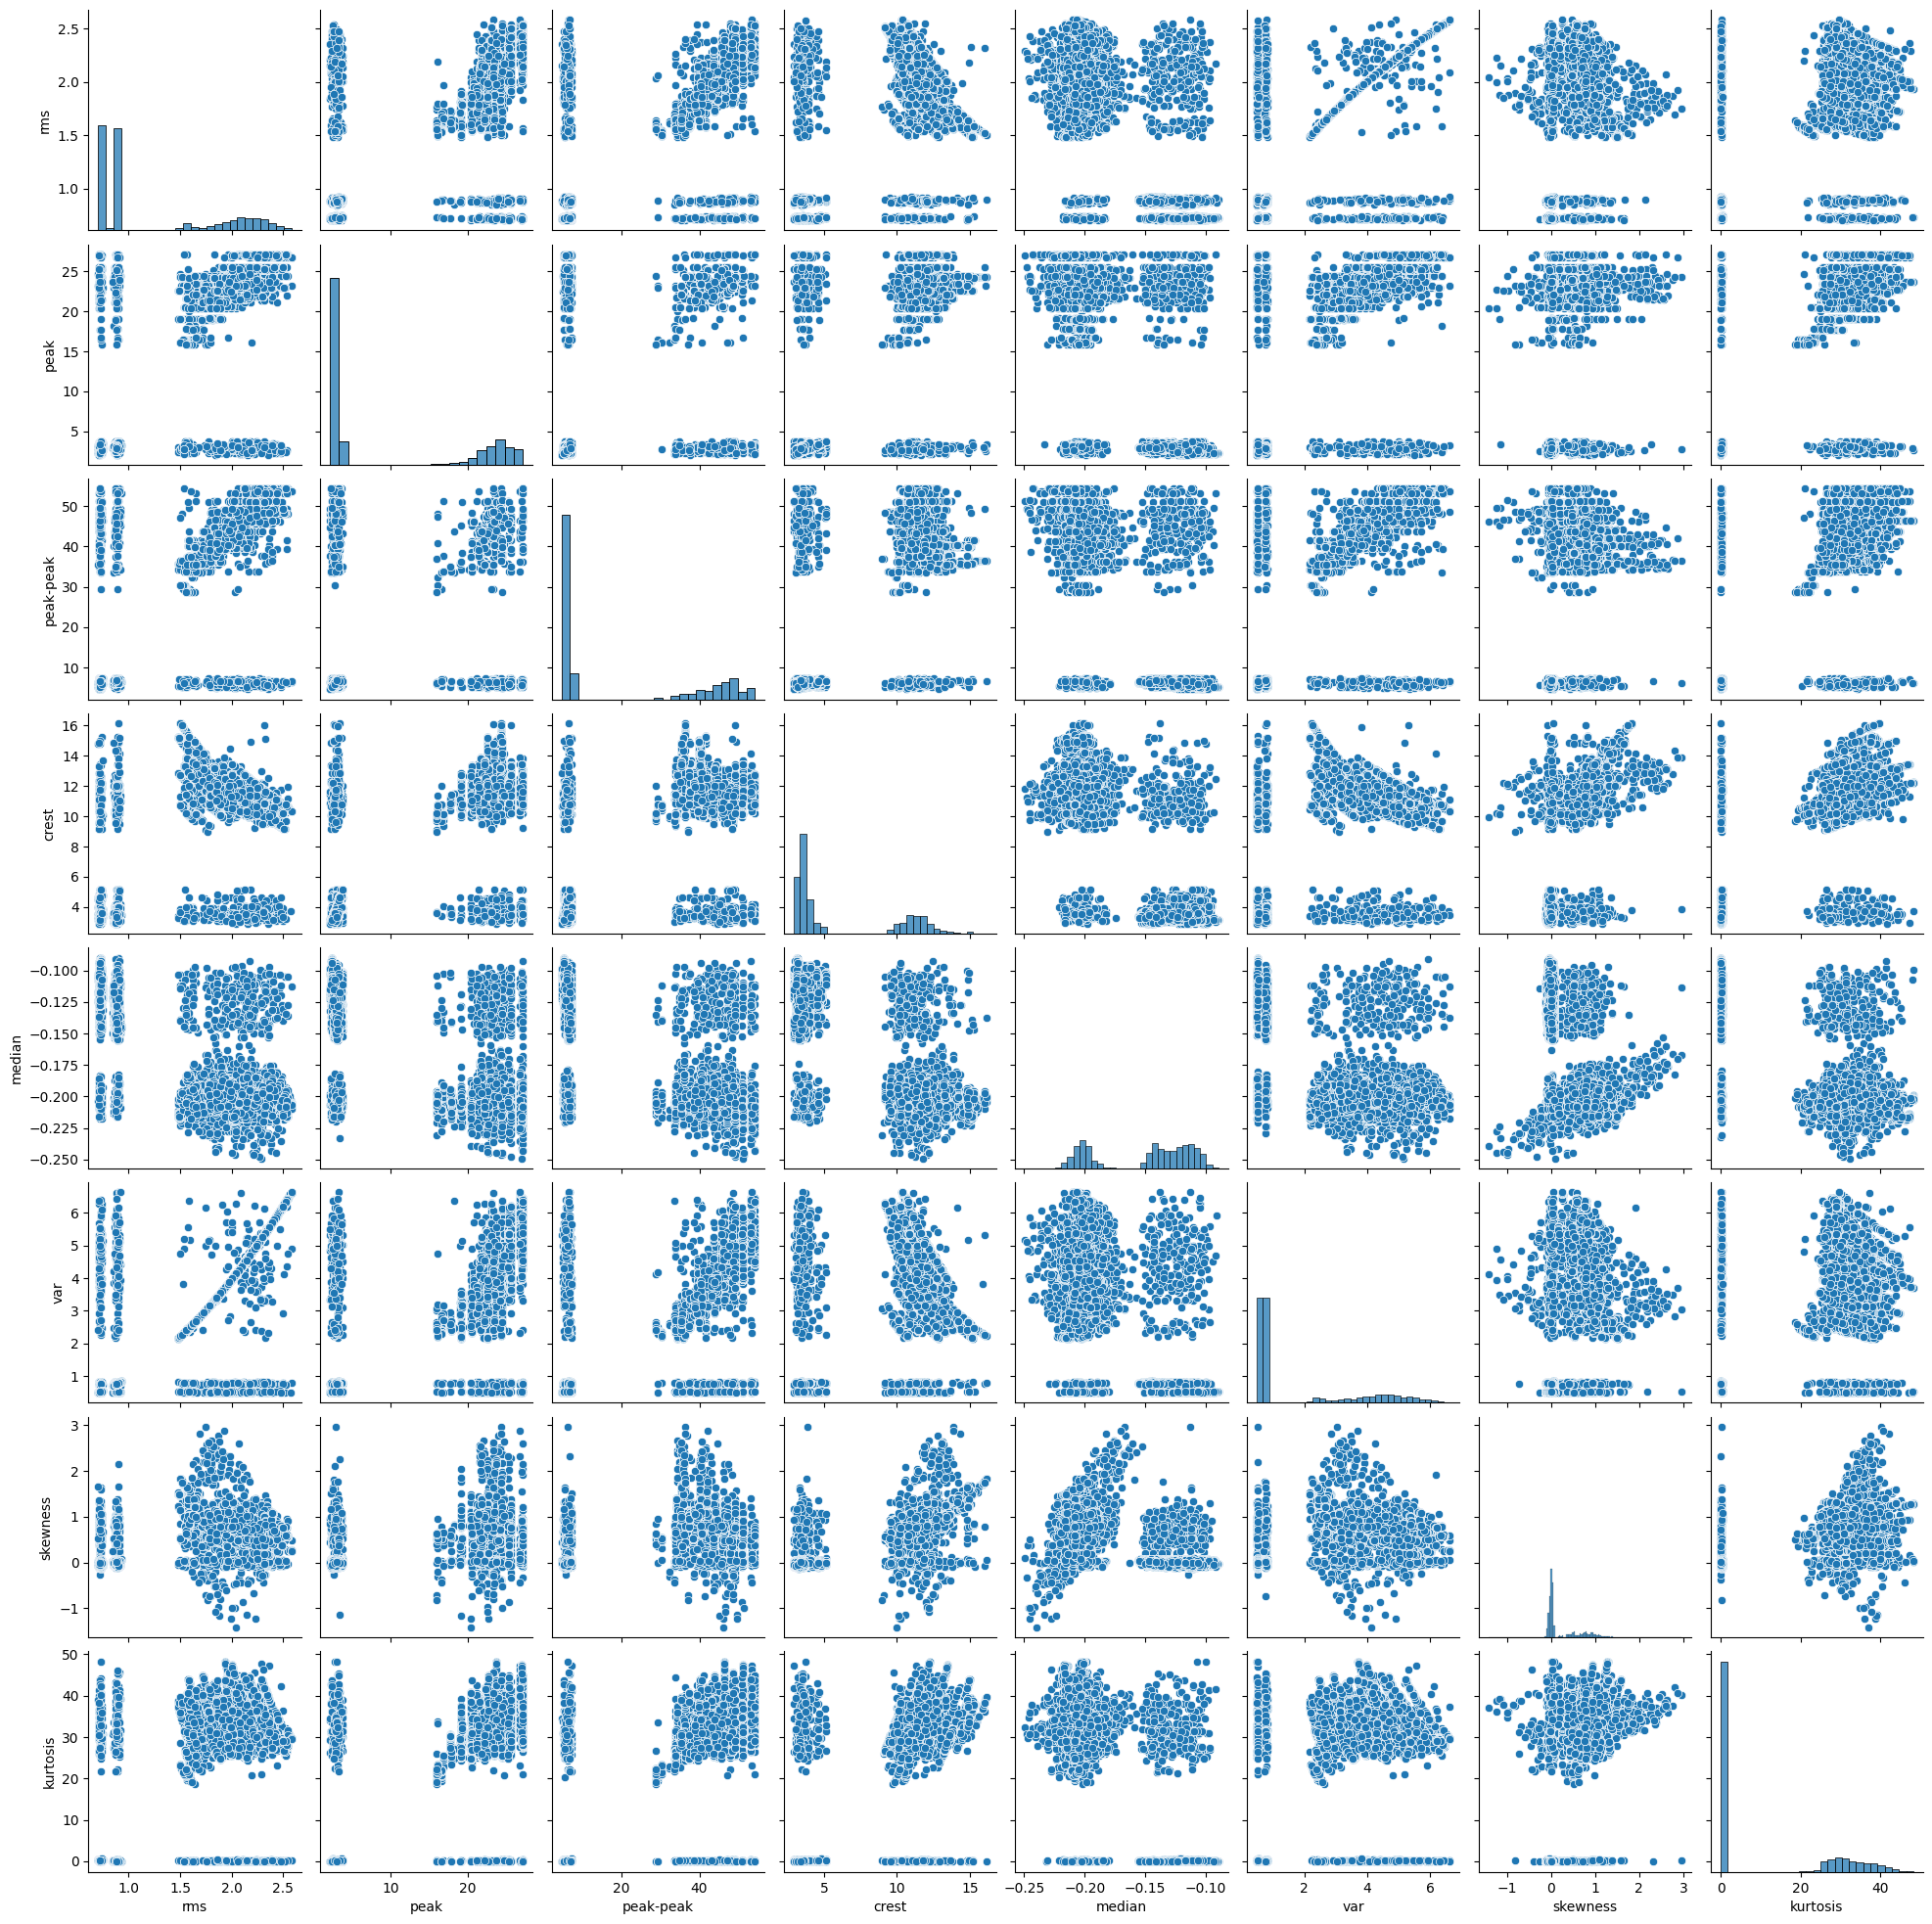

In [44]:
from Hw3 import pairplots

pairplots(df_clean)

Fig. 1: 2D scatter plots of all pairs of features

2.(b) Next the Pearson's correlation matrix is plotted using the corr() function.

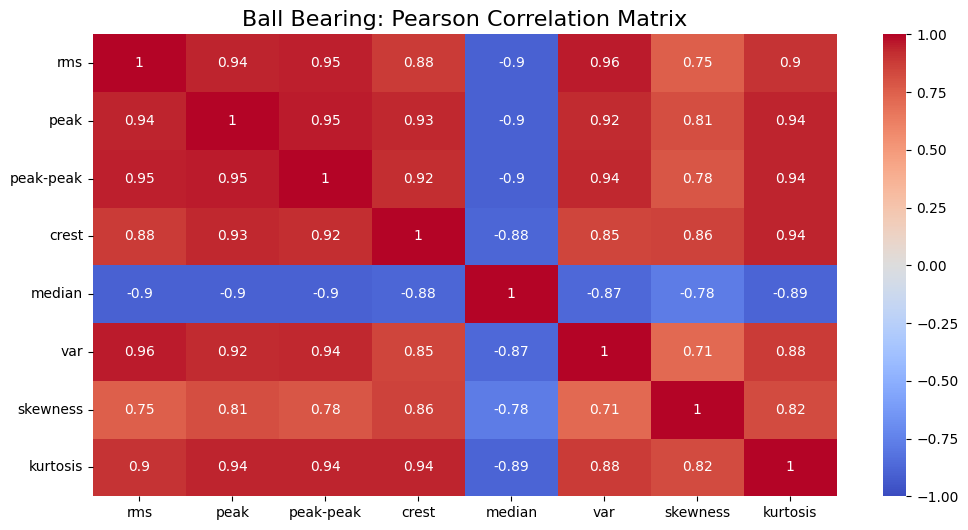

In [45]:
from Hw3 import correlation

correlation(df_clean)

Fig. 2: Pearson's correlation Matrix for all features. Although some pairs show correlation more than 0.95, we are not dropping them for this example

2. (c),(d) Next, clustering is carried out on the scaled data. Scaling is carried using the standardized scaling technique and then the clustering() function called with the scaled data being the attribute. First the DBSCAN clustering is done with $\epsilon$ = 0.8 and min_samples as 500. DBSCAN suggests 2 clusters and the remaining points are classified as 'noise'. Similarly, with 2 clusters as initial input 'K-means' clustering is carried out next. Fig. 3(a) shows the results in the form of a 8x8 grid where the lower triangular grid represents the DBSCAN clusters whereas, the upper triangular matrix shows the K-means results. It can be seen that decent accuracy in terms of categorizing the datapoints is achieved, but DBSCAN outputs contain noisy datapoints in close vicinity of the cluster regions. Intuitively, if min_samples for a neighborhood is increase, the noisy points might be considered within a particular cluster. 

Number of labels: 3
Number of clusters: 2
Number of noisy samples: 2366


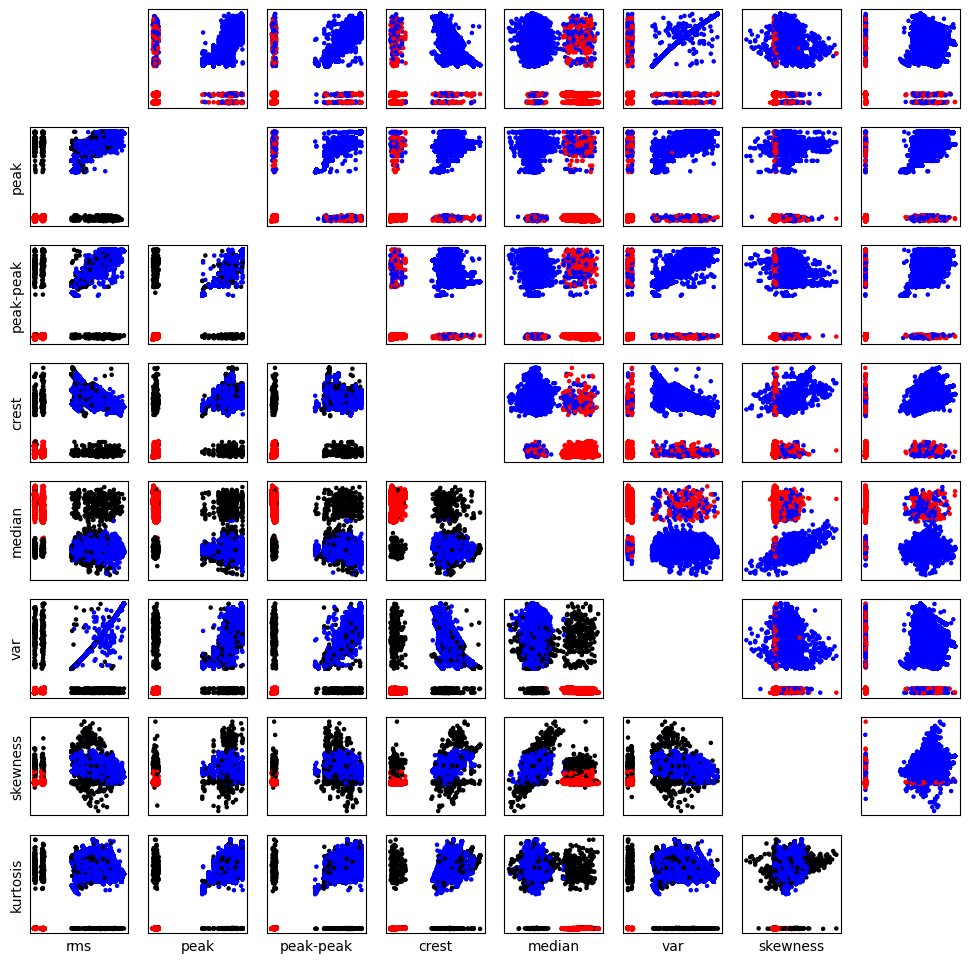

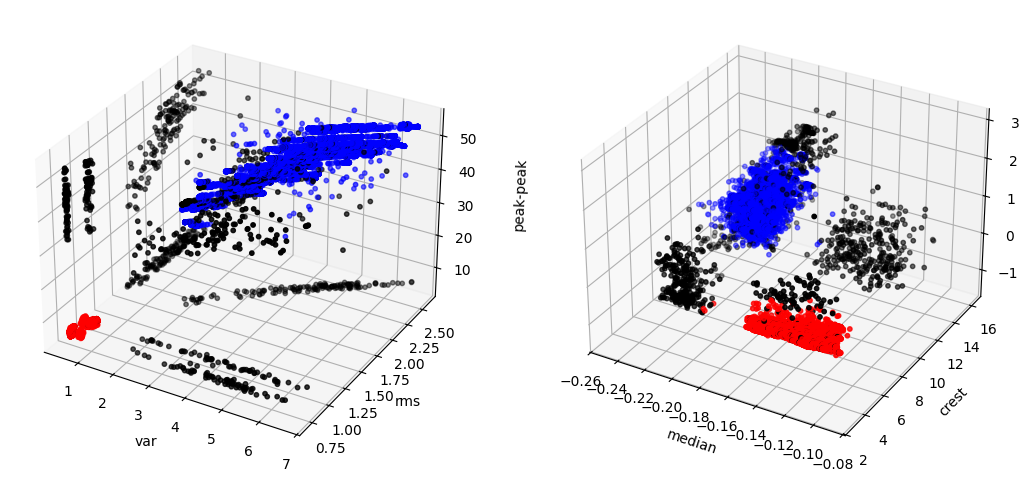

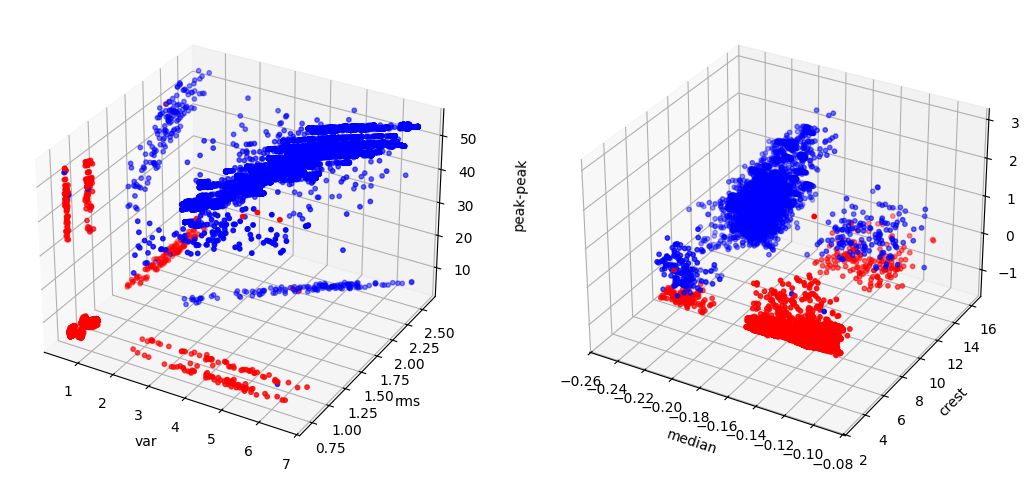

In [49]:
# Scaling the dataframe through standard scaling
df_scaled = Hw3.scaling(df_clean)

# Performing the clustering using DBSCAN and Kmeans
Hw3.clustering(df_scaled,df_clean)

Fig. 3(a) 2D clustering plots for DBSCAN (lower triangular matrix) and Kmeans (Upper triangular matrix) algortithms. Red - cluster 1, Blue - cluster 2 and Black - Noise. 3.(b) 3D scatter plots of DBSCAN clustering with rms-var-peak-peak combination on the left and mean-crest-skewness combination on the right. Color code being the same as previous. 3.(c) 3D scatter plots of K-means clustering with rms-var-peak-peak combination on the left and mean-crest-skewness combination on the right. Color code being the same as previous.

2.(e) As shown in the above fig. 3(b) and 3(c), based on the distribution of datapoints and the feature influences, 2 combinations of features are chosen, one being rms-var-peak-peak and the second being median-crest-skewness. The color tagging of the clusters remianing the same as before where cluster 1 is solored red and cluster 2 as blue. 

2.(f) Based on the observations, it seems like '2' clusters would be sufficient to characterize the data. Since cluster 2 (blue) represents datapoints with higher feature values, it is intuitive to categories cluster 2 as the failure state of the pump since ideally greater spectral characteristics indicate greater degree of randomness and dispersion of the vibrations which might lead to wear and tear of the ball bearings.

### Task #2

3. (a) Yes, it is necessary to scale the data so that we can bring all the ranges of the features within a comparable range and the data would not be skewed with respect to a particular feature causing bias in the prediction algorithms.

3. (b) PCA is carried out based on 95% of explained variance and thereby selecting 3 componenets to describe the transformed dataset.

In [50]:
# Calling the PCA function to do the PCA analysis and pick 3 components comprising more than 95% of explained variance
from Hw3 import PCA
data_transf = PCA(df_scaled)

Explained Variance Ratio: [0.89792688 0.04627836 0.01667765]
Total Explained Variance: 96.09%


3.(c) Clustering plots for 3 principal components carried out using DBSCAN and K-means is shown below.

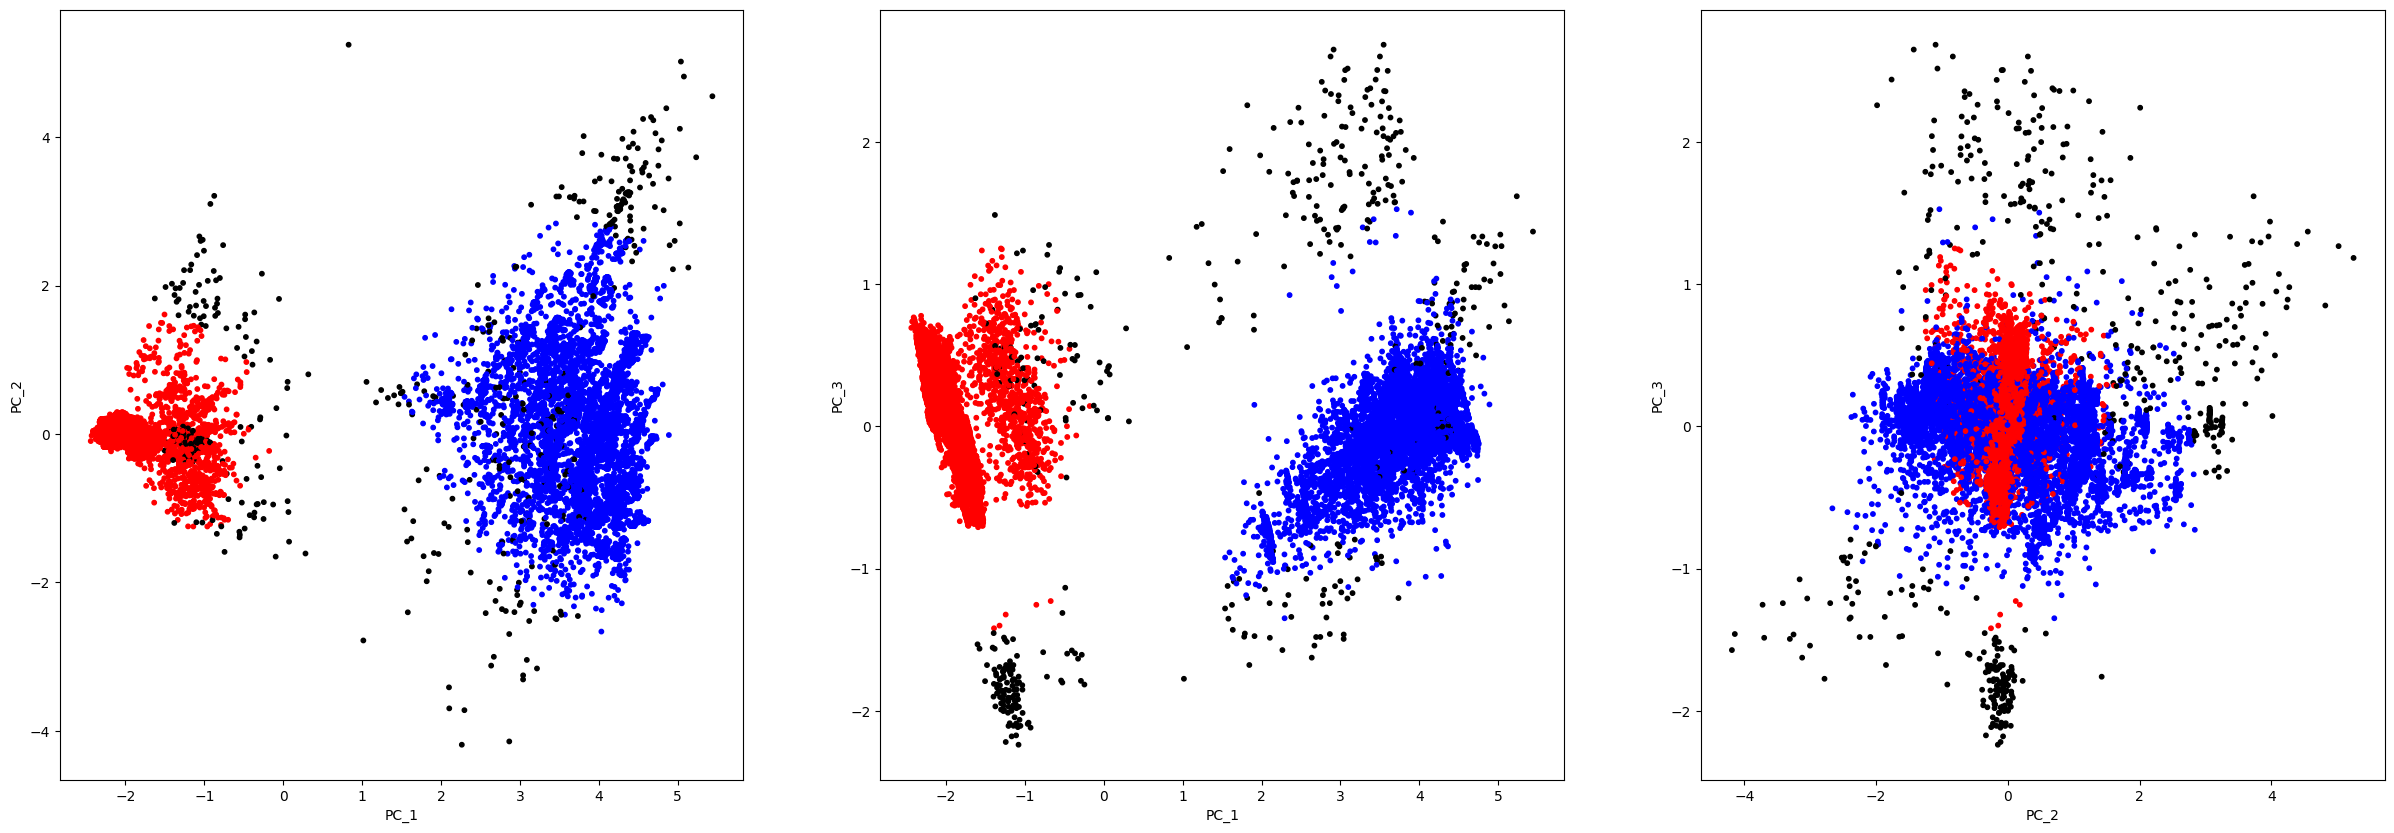

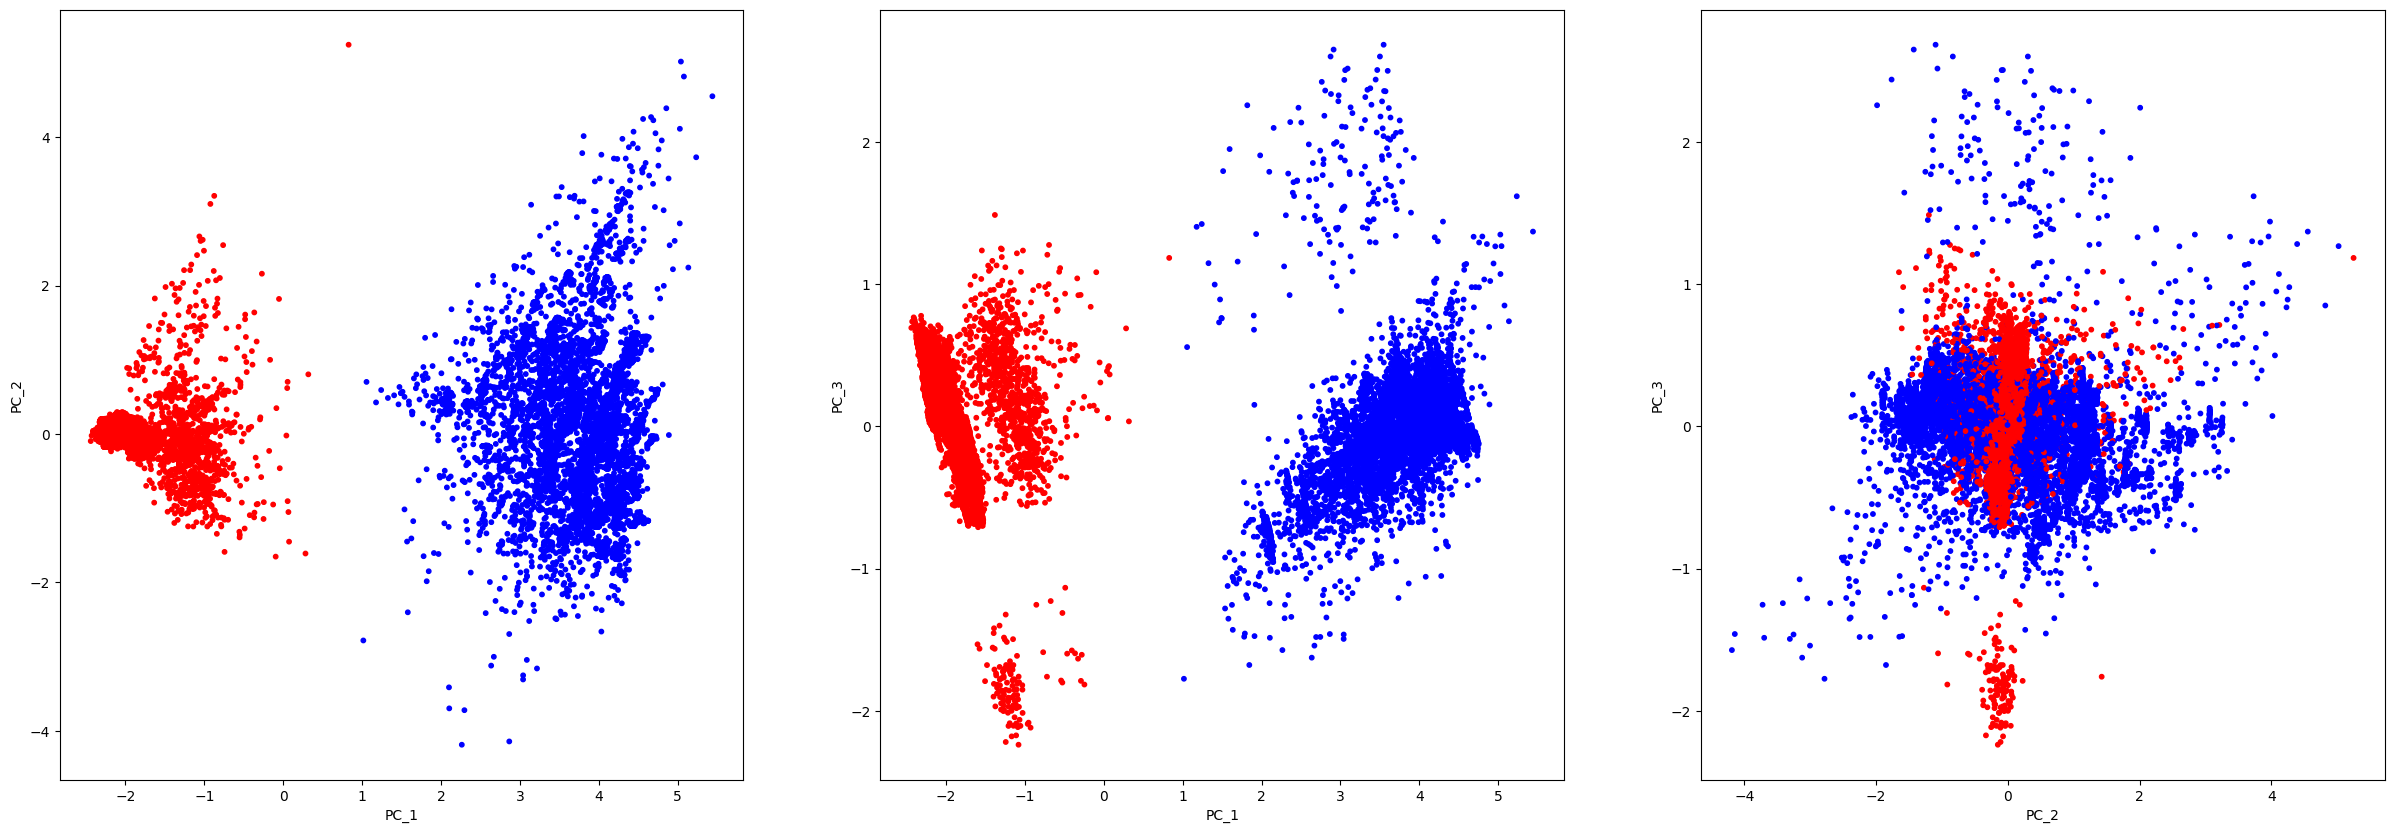

In [51]:
from Hw3 import clustering_PCA
clustering_PCA(data_transf)

Fig. 4(a) Cluster plots with 3 principal components for DBSCAN algorithm. Note that the amount of noise is reduced after PCA compared to the original data. 4.(b) Cluster plots with 3 principal components for K-means algorithm. In both figures, Red - Cluster 1, Blue - Cluster 2, Black - Noise.

3.(d) Plotting the PCA correlation matrix

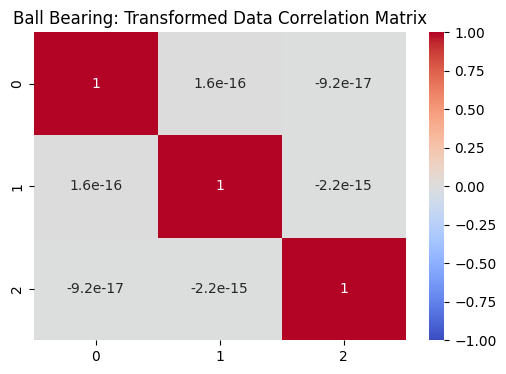

In [52]:
from Hw3 import PCA_correlation
PCA_correlation(data_transf)

Fig. 5: Correlation matrix for PCA transformed data with the PCs as features

3.(e) 2D cluster plots for each pair of original features carried out over the PCA transformed data using DBSCAN and K-means algorithms are presented herein.

Number of labels: 3
Number of clusters: 2
Number of noisy samples: 523


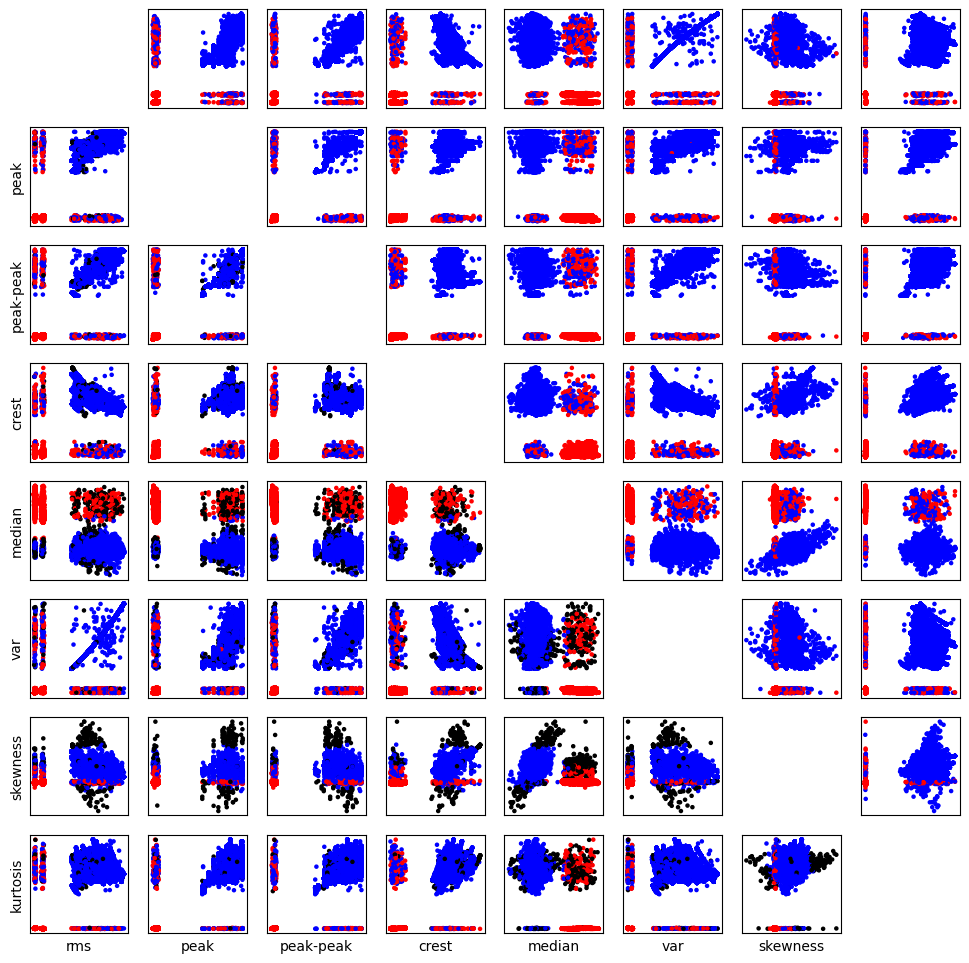

In [53]:
from Hw3 import clustering_PCA_2D
clustering_PCA_2D(data_transf,df_clean)

Fig. : 2D clustering plots for DBSCAN (lower triangular matrix) and Kmeans (Upper triangular matrix) algortithms with PCA transformed data. Red - cluster 1, Blue - cluster 2 and Black - Noise. Notice the reduction in the amount of noisy data in this case as compared to the non PCA data

3. (f) 3D scatter plots of data points in the PC domain 

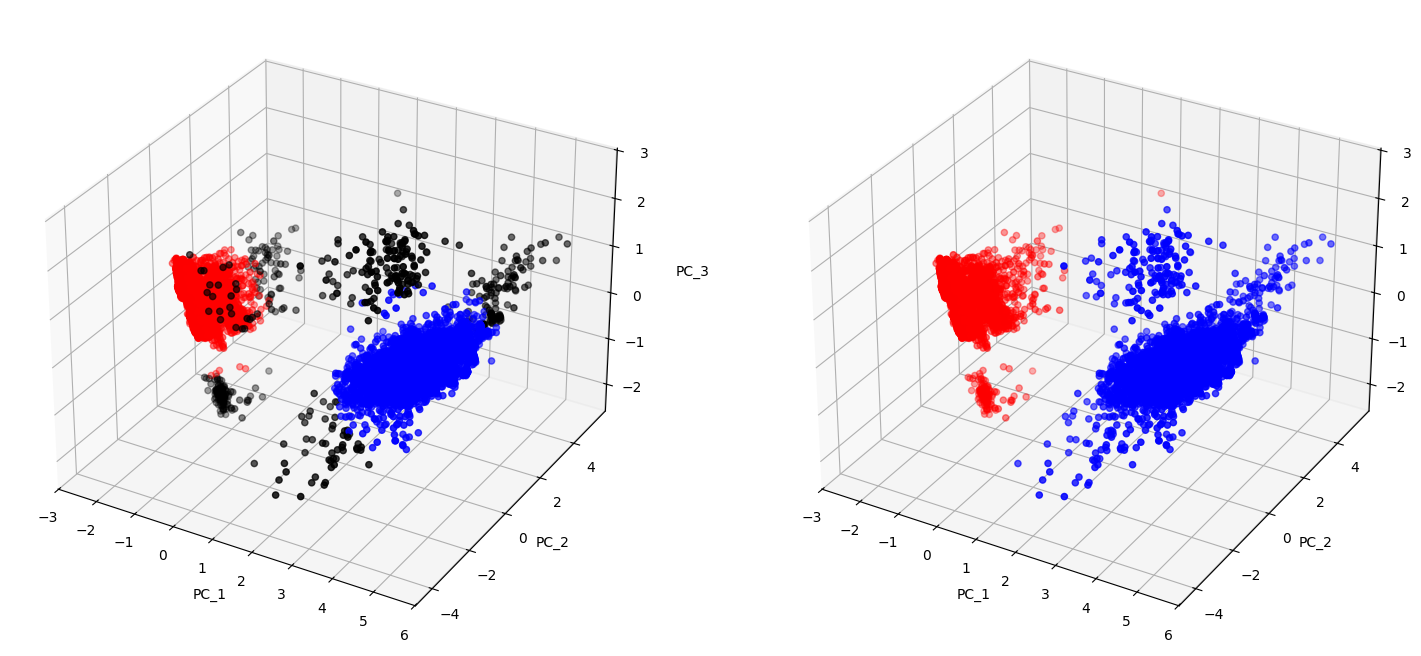

In [37]:
from Hw3 import three_dimensional_cluster_PCA
three_dimensional_cluster_PCA(data_transf)

Fig. 7(a) 3D scatter plots for PCA transformed data in PC space clustered using DBSCAN and 6(b) 3D scatter plots for PCA transformed data in PC space clustered using K-means. In both figures, Red - cluster 1, Blue - cluster 2, Black -  Noise.

We can also plot the clusters in the cluster-distance space.

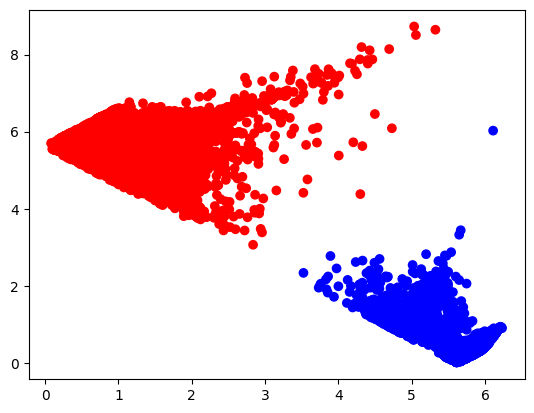

In [54]:
from Hw3 import cluster_space_plot
cluster_space_plot(data_transf)

Fig. 8: Scatter of the PCA transformed data points in the cluster-distance space. Red - cluster 1 and Blue - cluster 2

2.(g) Based on the above scatter plots, 2 number of clusters seem ideal for this dataset. 
